In [63]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import fuzzy as fy
from collections import namedtuple
import seaborn as sns

In [5]:
df = pd.read_csv('../../StateNames.csv')

In [7]:
male = df[df.Gender == 'M']

In [8]:
female = df[df.Gender == 'F']

In [9]:
sample = df.sample(20000)

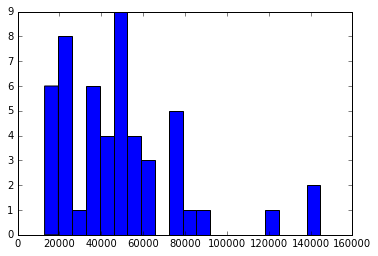

In [10]:
plt.hist(male.groupby('State').count()['Count'], bins = 20);

In [12]:
len(df.Name.unique()), len(male.Name.unique()), len(female.Name.unique())

(30274, 13139, 20031)

In [34]:
unique_names = []

for year in range(1910,2015,1):
    unique_names.append(len(df[df['Year']==year].Name.unique()))

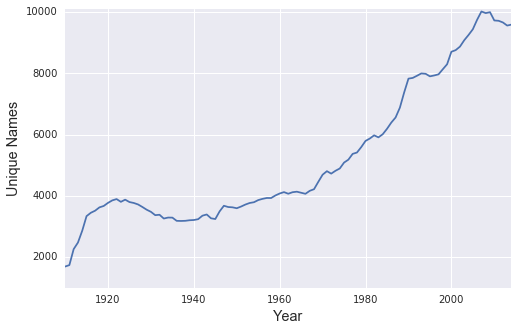

In [65]:
fig = plt.figure(figsize=(8,5))
sns.plt.plot(range(1910,2015,1), unique_names)
plt.xlim(1910,2014)
plt.ylim(1000, 10100)
plt.xlabel('Year', fontsize='large')
plt.ylabel('Unique Names', fontsize='large');

In [4]:
df_decade = df[(df['Year'] > 2000)]

In [26]:
len(df_decade.Name.unique())

18732

In [31]:
# sample.groupby('Name').count()

In [5]:
soundex = fy.Soundex(4)

In [6]:
sample['Soundex'] = sample.Name.apply(soundex)

In [7]:
sample['nyiis'] = sample.Name.apply(fy.nysiis)

In [144]:
# sample.groupby(['Name','Year']).head()

In [143]:
# df.groupby(['Name']).head()

In [61]:
sample[(sample.Name == 'Wyoma')].head(50)

,Id,Name,Year,Gender,State,Count,Soundex,nyiis


In [8]:
lat_lon = pd.read_csv('state_latlon.csv')

In [9]:
names = pd.read_csv('CSV_Database_of_First_Names.csv')

In [69]:
names.head()

,firstname
0,Aaron
1,Aaron
2,Abbey
3,Abbie
4,Abby


In [10]:
births = pd.read_csv('births.csv')

In [80]:
births.sort_values(['year','sex']).head()

,year,state,sex,births
0,1981,AK,boy,4721
26,1981,AL,boy,31828
52,1981,AR,boy,19122
78,1981,AZ,boy,25091
104,1981,CA,boy,203950


In [12]:
old_test = pd.read_table('old-testament.txt')
old_test.columns = ['names']

In [19]:
names_list = [name.lower() for name in old_test.names]

In [20]:
borders = pd.read_csv('neighbors-states.csv')

In [21]:
cond_list = '|'.join(names_list)

In [129]:

# new_col.columns = 'Biblical'

AttributeError: 'DataFrame' object has no attribute 'str'

In [22]:
sample['new_name'] = sample.Name.str.lower()

In [23]:
new_col = sample.Name.str.contains(cond_list)
sample = pd.concat([sample, new_col],axis=1)

In [24]:
col_list = sample.columns.tolist()
col_list[9] = 'biblical'

In [25]:
sample.columns = col_list

In [149]:
peter = df[df.Name == 'Peter']

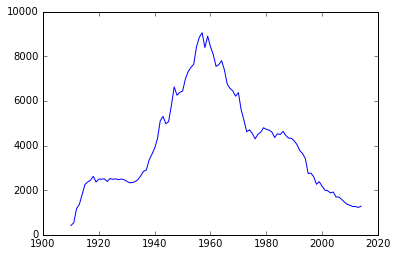

In [172]:
plt.plot(peter.groupby('Year').Count.sum())

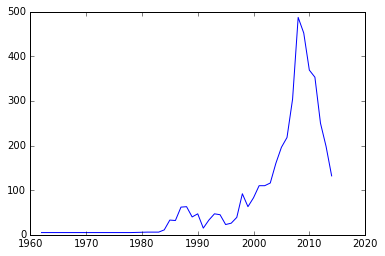

In [173]:
kale = df[df.Name == 'Kale']
plt.plot(kale.groupby('Year').Count.sum())

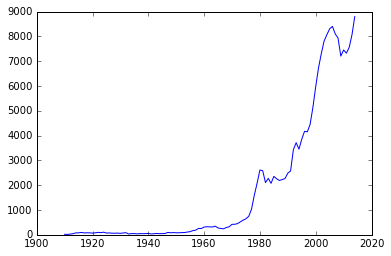

In [174]:
luke = df[df.Name == 'Luke']
plt.plot(luke.groupby('Year').Count.sum())

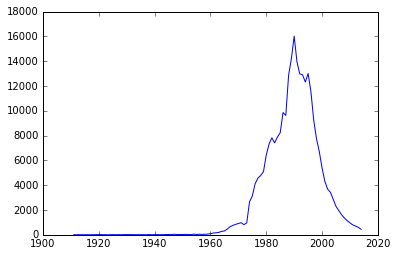

In [47]:
courtney = df[df.Name == 'Courtney']
plt.plot(courtney.groupby('Year').Count.sum())

In [52]:
courtney.groupby('Year').Count.sum().max()

16023

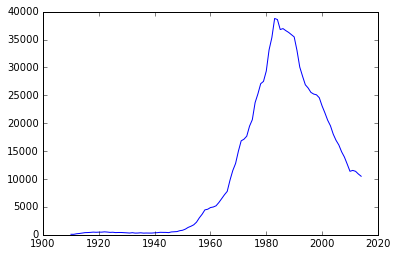

In [176]:
matthew = df[df.Name == 'Matthew']
plt.plot(matthew.groupby('Year').Count.sum())

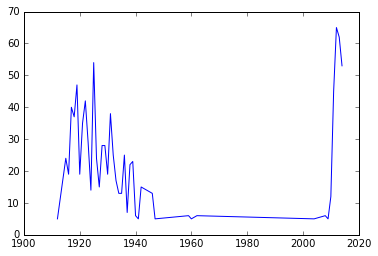

In [53]:
emmit = df[(df.Name == 'Emmit')]
plt.plot(emmit.groupby('Year').Count.sum())

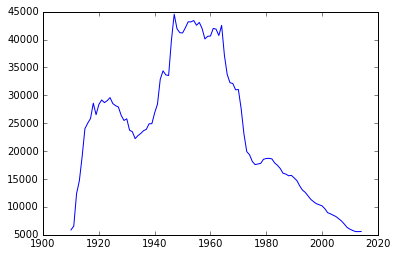

In [179]:
john = df[(df.Name == 'John')]
plt.plot(john.groupby('Year').Count.sum())

In [207]:
# df_decade.groupby(['Name']).sum().Count.sort_values(ascending=False)

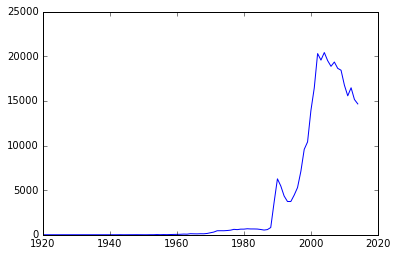

In [201]:
ethan = df[(df.Name == 'Ethan')]
plt.plot(ethan.groupby('Year').Count.sum())

In [217]:
# from nltk.corpus import splt
# import sylli

In [27]:
# import curses 
# from curses.ascii import isdigit 
# import nltk
# from nltk.corpus import cmudict 
# d = cmudict.dict() 


In [28]:
# def nsyl(word): 
#    return [list(y for y in x if isdigit(y[-1])) for x in d[word.lower()]]

# nsyl('arithmetic')
# nsyl('Benjamin')

In [29]:
# def syllables(word):
#     vowels = 'aeiouy'
#     first_syl = ''
#     for letter in word:
#         if 

In [30]:
sample['first'] = sample.Name.str[0]

In [31]:
sample['last'] = sample.Name.str[-1]

In [32]:
verbose = True
def count_syllables(word):
    vowels = ['a', 'e', 'i', 'o', 'u']

    on_vowel = False
    in_diphthong = False
    minsyl = 0
    maxsyl = 0
    lastchar = None

    word = word.lower()
    for c in word:
        is_vowel = c in vowels

        if on_vowel == None:
            on_vowel = is_vowel

        # y is a special case
        if c == 'y':
            is_vowel = not on_vowel

        if is_vowel:
            if verbose: print c, "is a vowel"
            if not on_vowel:
                # We weren't on a vowel before.
                # Seeing a new vowel bumps the syllable count.
                if verbose: print "new syllable"
                minsyl += 1
                maxsyl += 1
            elif on_vowel and not in_diphthong and c != lastchar:
                # We were already in a vowel.
                # Don't increment anything except the max count,
                # and only do that once per diphthong.
                if verbose: print c, "is a diphthong"
                in_diphthong = True
                maxsyl += 1
        elif verbose: print "[consonant]"

        on_vowel = is_vowel
        lastchar = c

    # Some special cases:
    if word[-1] == 'e':
        minsyl -= 1
    # if it ended with a consonant followed by y, count that as a syllable.
    if word[-1] == 'y' and not on_vowel:
        maxsyl += 1

    return minsyl, maxsyl

In [36]:
df_decade.groupby(['Year']).Count.sum()

Year
2001    3250984
2002    3238053
2003    3288978
2004    3293984
2005    3305315
2006    3387737
2007    3412417
2008    3340318
2009    3232116
2010    3116548
2011    3079145
2012    3073858
2013    3066443
2014    3113611
Name: Count, dtype: int64

In [42]:
df_decade.groupby(['Year','Name']).Count.sum()

Year  Name     
2001  AALIYAH       193
      AAMIR           5
      AARON        4255
      ABBEY          38
      ABBIE          54
      ABBY           91
      ABEL           46
      ABIGAEL         6
      ABIGAIL      1552
      ABIGALe        11
      ABRAHAM       358
      ABRAM          54
      ABRAN           9
      ABRIANa         6
      ABRIANna        7
      ABRIL           9
      ADA            40
      ADAM         2795
      ADAMARi        37
      ADAN           26
      ADDIE          22
      ADDISON       254
      ADELAIDe       18
      ADELE          11
      ADELINa        22
      ADELINe        22
      ADIL            9
      ADIN           12
      ADISON          5
      ADITI           6
                   ... 
2014  Zuri          548
      Zuria          33
      Zuriel         58
      Zurisadai      12
      Zury            5
      Zuzanna        21
      Zvi             8
      Zya             6
      Zyair          25
      Zyaire        140


In [50]:
test_dict = df_decade.to_dict(orient='index')
    

In [53]:
test_dict[10736]

{'Count': 54,
 'Gender': 'F',
 'Id': 10737,
 'Name': 'Madison',
 'State': 'AK',
 'Year': 2001}

In [58]:
sample1 = sample.set_index(['new_name', 'Year'])

In [65]:
sample1.groupby(level=['Year']).sum().sum()

Id          5.659005e+10
Count       1.069160e+06
biblical    9.000000e+00
dtype: float64

In [69]:
dictionary = sample1.to_dict(orient='index')

In [77]:
Row = namedtuple('Row', ['name','year'])

In [95]:
key_tuple = Row(name='_', year=2005)

In [96]:
keys = dictionary.keys()

In [97]:
milli = [row for key in keys if key.year==2000]

AttributeError: 'tuple' object has no attribute 'year'